<center>
<h1> Assignment 3: Regression Analysis</h1>
<hr>
<h2>Predict The Bay Area’s Home Prices</h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: 11.30 AM, Mar 14th, 2022 (Monday)</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr. Ashraf Bhuiyan </h4>


</center>

### Please put your name, student ID, date and time here (5 points)
* Name: Pamidi Ajay Kumar
* Student ID: A
* Date: 14th Mar 2022
* Time: 11:30 PM

### Instructions
* In this assignment, you will investigate the housing price dataset from Bay Area Home Sales Database and Zillow to Predict The Bay Area’s Home Prices.
* This dataset was based on the homes sold between January 2013 and December 2015.
* Please use all the techniques we have learned in the class to preprocesss/clean the dataset.
* You can drop redundant features.
<p style="color:blue"><b>final_data.csv</b></p>
* Please apply the folowing four methods to Predict The Bay Area’s Home Prices.

<h3>Method 1: Multiple Linear Regression</h3>

* Bulding the optimal model using Automatic implementations of Backward Elimination
```
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
```
* <mark>Split the dataset into training sets and test sets</mark>

* Fit LinearRegression to the training sets 
* Print the Linear Regression R squared score on the test sets
* Print the Linear Regression RMSE score on the test sets

<h3>Method 2: Least Absolute Shrinkage and Selection Operator(Lasso)</h3>

* Fit Lasso to the training sets. 
* Print the Lasso R squared score on the test sets
* Print the Lasso RMSE score on the test sets

<h3>Method 3: Decision Tree </h3>

* Fit Decision Tree to the training set. 
* Print the Decision Tree R squared score on the test sets
* Print the Decision Tree RMSE score on the test sets

<h3>Method 4: Random Forest </h3>

* Fit Random Forest to the training sets. 
* Print the Random Forest R squared score on the test sets
* Print the Random Forest RMSE score on the test sets

## 1. Import dataset "final_data.csv" in pandas (5 points)

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("final_data.csv")
dataset.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 5.301444
Kurtosis: 55.273743


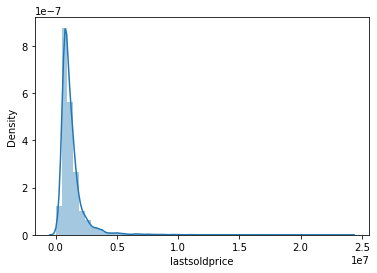

In [129]:
sns.distplot(dataset['lastsoldprice']);
#skewness and kurtosis
print("Skewness: %f" % dataset['lastsoldprice'].skew())
print("Kurtosis: %f" % dataset['lastsoldprice'].kurt())

## 2. Preprocess/Clean the Dataset(20 points)

In [130]:
'''
The two columns "lastsolddate" and "yearsbuilt" are of different types.
They are object and float type respectively. So converting them to datetime type into "Years"
and finding the difference to get the exact age of the property in "YearsOLD" column
'''
dataset['lastsolddate'] = pd.to_datetime(dataset['lastsolddate'])
dataset['lastsoldyear'] = pd.DatetimeIndex(dataset['lastsolddate']).year

dataset["Years_OLD"] = dataset.lastsoldyear - dataset.yearbuilt

# Also dropping the unnecessory column at start "Unnamed: 0"
dataset = dataset.drop(["Unnamed: 0"],axis = 1)


In [131]:
dataset.isnull().sum()

address          0
info             0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
lastsoldyear     0
Years_OLD        0
dtype: int64

In [132]:
"""
Dataset contains many columns with categorical datatype, but categories 
are more than 10, so not possible to make dummies
Alse, the float type objects such as ZipCode, Zid, zinde etc are not
actually a numerical datatype which will affect the price of property
So, keeping only relevent columns in dataset as follows:
"""

dataset = dataset[["bathrooms","bedrooms","totalrooms","finishedsqft","Years_OLD","zestimate","lastsoldprice"]] 
dataset.head()

,bathrooms,bedrooms,totalrooms,finishedsqft,Years_OLD,zestimate,lastsoldprice
0,2.0,2.0,4.0,1043.0,9.0,1167508.0,1300000.0
1,1.0,1.0,3.0,903.0,12.0,823719.0,750000.0
2,4.0,3.0,6.0,1425.0,13.0,1708594.0,1495000.0
3,3.0,3.0,10.0,2231.0,89.0,2411236.0,2700000.0
4,3.0,3.0,4.0,1300.0,116.0,1918539.0,1530000.0


In [133]:
dataset.describe()

,bathrooms,bedrooms,totalrooms,finishedsqft,Years_OLD,zestimate,lastsoldprice
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04
mean,1.980229,2.614475,6.111562,1585.420918,65.310327,1.565695e+06,1.263928e+06
std,1.047358,1.299457,12.125819,921.978245,37.942097,1.229417e+06,1.042079e+06
min,0.500000,0.000000,1.000000,1.000000,-7.000000,4.323850e+05,5.350000e+02
25%,1.000000,2.000000,4.000000,1019.000000,28.000000,9.052375e+05,7.292500e+05
50%,2.000000,2.000000,5.000000,1362.000000,74.000000,1.230758e+06,9.900000e+05
75%,2.000000,3.000000,7.000000,1876.000000,98.000000,1.731170e+06,1.450000e+06
max,14.000000,20.000000,1264.000000,27275.000000,153.000000,1.553325e+07,2.388900e+07


In [134]:
'''
Now some of the sold prices are very extreme, like min sold price is only $535, which is outlire.
so, removing outliers with some threshold values
'''
min_thresold_price, max_thresold_price = dataset.lastsoldprice.quantile([0.001,0.999])
print("Outliers in price Threshold",min_thresold_price, max_thresold_price)
'''
also, total rooms max value is 1264, which is an outlier.
So, keeping the properties with total room < 30 in our dataset
'''
dataset[dataset.totalrooms > 30]


Outliers in price Threshold 16322.500000000002 10998355.000000011


,bathrooms,bedrooms,totalrooms,finishedsqft,Years_OLD,zestimate,lastsoldprice
8300,2.0,2.0,94.0,805.0,20.0,502285.0,325000.0
8967,2.0,2.0,1264.0,1264.0,1.0,1591608.0,1375000.0
11175,7.0,13.0,33.0,7957.0,100.0,9304469.0,3350000.0


In [135]:
dataset = dataset[(dataset.lastsoldprice < max_thresold_price) & (dataset.lastsoldprice > min_thresold_price)]
dataset.shape

(11306, 7)

In [136]:
'''
dataset = dataset[(dataset.totalrooms < 30)]
dataset.shape
'''

'\ndataset = dataset[(dataset.totalrooms < 30)]\ndataset.shape\n'

In [137]:
#Target : lastsoldprice column
#features: reset of columns except lastsoldprice
X = dataset.drop('lastsoldprice', axis=1)
y = dataset['lastsoldprice']

In [138]:
# Now split the data into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

print("X_Train_shape",X_train.shape, "\nX_Test_shape",X_test.shape, "\ny_Train_shape",y_train.shape, "\ny_Test_shape",y_test.shape)

X_Train_shape (9044, 6) 
X_Test_shape (2262, 6) 
y_Train_shape (9044,) 
y_Test_shape (2262,)


## 3. Method 1: Multiple Linear Regression (15 points)

Intercept:  133211.58158204402
Coefficients:  [ 8.23895441e+04 -3.71149332e+04 -3.30043549e+01 -7.12177746e+01
  1.16624343e+03  6.99239454e-01]
R2 socre is 0.7824834514475509
mean_sqrd_error is== 214944384177.54922
root_mean_squared error of is== 463620.9488122266


Text(0.5, 1.0, 'Actual vs. Multi-Linear reg Prediction')

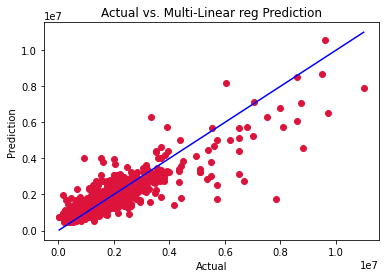

In [139]:
#Import Required Libraries for Linear Regression

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


mlin_regr = linear_model.LinearRegression()
mlin_regr.fit(X_train, y_train)

#Print the results of intercept and Coefficient values
print('Intercept: ', mlin_regr.intercept_)
print('Coefficients: ', mlin_regr.coef_)

# Prediction step
y_pred_mlin = mlin_regr.predict(X_test)  

# prediction accuracy score check
score=r2_score(y_test,y_pred_mlin)
print('R2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_mlin))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_mlin)))

# scatter for actual vs predition in MultiLinear Model

plt.scatter(x=y_test, y=y_pred_mlin,c='crimson')
p1 = max(max(y_pred_mlin), max(y_test))
p2 = min(min(y_pred_mlin), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Multi-Linear reg Prediction')


In [140]:
'''
Backward Substitution Method for Linear Regression
'''

import statsmodels.api as sm
x = np.append(arr=np.ones((11306,1)).astype(int),values=X, axis =  1)

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x


sl = 0.05
X_opt = x[:, [0, 1, 2, 3, 4, 5, 6]]
X_Modeled = backwardElimination(X_opt, sl)

regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lastsoldprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     6135.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:09:15   Log-Likelihood:            -1.6338e+05
No. Observations:               11306   AIC:                         3.268e+05
Df Residuals:                   11299   BIC:                         3.268e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.223e+05   1.16e+04     10.582      0.000    9.96e+04    1.45e+05
x1          8.881e+04   6938.169     12.800      0.000    7.52e+04    1.02e+05
x2          -4.39e+04   5419.200     -8.101      0.000   -5.45e+04   -3.33e+04
x3          -126.9979    359.297     -0.353      0.724    -831.282     577.287
x4           -61.2846      9.193     -6.666      0.000     -79.305     -43.264
x5          1073.4277    124.535      8.620      0.000     829.318    1317.538
x6             0.7051      0.006    123.669      0.000       0.694       0.716
==============================================================================
Omnibus:                     3872.549   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476456.853
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                      34.779   Cond. No.                     5.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# Remove x3 which has p value more than 0.05
X_opt = x[:, [0, 1, 2, 4, 5, 6]] 
X_Modeled = backwardElimination(X_opt, sl)
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lastsoldprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     7363.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:09:16   Log-Likelihood:            -1.6338e+05
No. Observations:               11306   AIC:                         3.268e+05
Df Residuals:                   11300   BIC:                         3.268e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.221e+05   1.15e+04     10.579      0.000    9.94e+04    1.45e+05
x1          8.879e+04   6937.661     12.798      0.000    7.52e+04    1.02e+05
x2           -4.4e+04   5412.202     -8.129      0.000   -5.46e+04   -3.34e+04
x3           -61.4409      9.182     -6.691      0.000     -79.440     -43.442
x4          1073.0262    124.525      8.617      0.000     828.936    1317.116
x5             0.7051      0.006    123.677      0.000       0.694       0.716
==============================================================================
Omnibus:                     3872.670   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476437.454
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                      34.779   Cond. No.                     5.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Method 2: Least Absolute Shrinkage and Selection Operator(Lasso) (5 points bonus)

In [146]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,1e3,5e3,1e4]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.596e+14, tolerance: 6.216e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.472e+14, tolerance: 6.209e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

{'alpha': 10000.0}
-222418254828.28778


C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lastsoldprice', ylabel='Density'>

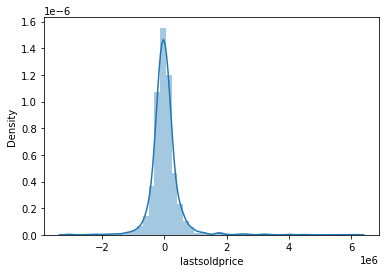

In [147]:
prediction_lasso = lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction_lasso)

R2 socre is 0.7805171387358291
mean_sqrd_error is== 216887444959.5183
root_mean_squared error of is== 465711.76167187176


Text(0.5, 1.0, 'Actual vs. LASSO Prediction')

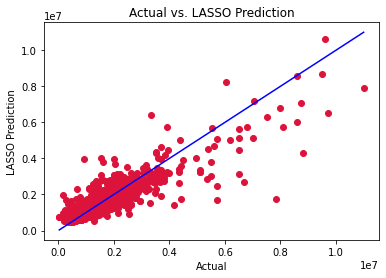

In [148]:
# predicting the accuracy score
score=r2_score(y_test,prediction_lasso)
print('R2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,prediction_lasso))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,prediction_lasso)))


# scatter for actual vs predition in LASSO

plt.scatter(x=y_test, y=prediction_lasso,c='crimson')
p1 = max(max(prediction_lasso), max(y_test))
p2 = min(min(prediction_lasso), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('LASSO Prediction')
plt.title('Actual vs. LASSO Prediction')

## 5. Method 3: Decision Tree (20 points)

In [162]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_Tree_reg =DecisionTreeRegressor()
decision_Tree_reg.fit(X_train,y_train)

# Model Prediction
predictin_tree = decision_Tree_reg.predict(X_test)

R2 socre is 0.6822598497007799
mean_sqrd_error is== 313982827463.2617
root_mean_squared error of is== 560341.7059823958


Text(0.5, 1.0, 'Actual vs. Decision Tree Prediction')

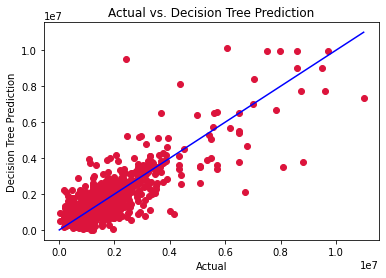

In [165]:
# predicting the accuracy score
score=r2_score(y_test,predictin_tree)
print('R2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predictin_tree))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predictin_tree)))


# find scatter plot for prediction and actual

plt.scatter(x=y_test, y=predictin_tree, c= 'crimson')
p1 = max(max(predictin_tree), max(y_test))
p2 = min(min(predictin_tree), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Decision Tree Prediction')
plt.title('Actual vs. Decision Tree Prediction')

## 6. Method 4: Random Forest (20 points)

In [168]:
from sklearn.ensemble import RandomForestRegressor
#random_forrest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with X_train and y_test data
#random_forrest_regressor.fit(X_train, y_train)


R2 socre is 0.8102098778623044
mean_sqrd_error is = 187545826730.6602
root_mean_squared error of is = 433065.61480988096


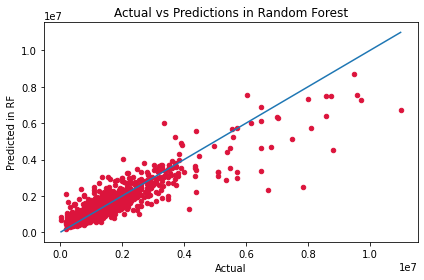

In [170]:
Rand_FR = RandomForestRegressor(n_estimators=500, n_jobs=-1)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred_rf, s=20, c='crimson')
plt.title('Actual vs Predictions in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()


# predicting the accuracy score
score=r2_score(y_test,y_pred_rf)
print('R2 socre is',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_pred_rf))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

## 7. Test Data Set Prediction Results Comparison Table of Method 1, Method 2, Method 3 and Method 4 (15 points)
* Please fill in your results to the following table

<table>
<thead>
    <tr>
    <th colspan="4">Predict The Bay Area’s Home Prices</th>
    </tr>
    <tr>
    <th> </th>
    <th>Multiple Linear Regression</th>
    <th>Lasso</th>
    <th>Decision Tree</th>
    <th>Random Forest</th>
    </tr>
</thead>
<tbody>
    <tr>
        <th>R Squared Score</th>
        <td> 0.7824834514475509 </td>
        <td> 0.7805171387358291 </td>
        <td> 0.6822598497007799 </td>
        <td> 0.8102098778623044 </td>
    </tr>
     <tr>
         <th>RMSE</th>
        <td> 463620.9488122266 </td>
        <td> 465711.7616718717 </td>
        <td> 560341.7059823958 </td>
        <td> 433065.6148098809 </td>
    </tr>
</tbody>
</table>